### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values. 

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from fractions import Fraction
import textwrap
import warnings
warnings.simplefilter(action='ignore')



### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


data = pd.read_csv('data/coupons.csv')

In [4]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

2.1 Information about the column types in the data frame.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.shape

(12684, 26)

In [7]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2.2 Unique values in each column of type 'object' in the data frame. 

In [8]:

data.apply(lambda col: col.unique() if col.dtype == 'object' else None).dropna() 



destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $49999, $62500 - $74999, $12500 - $2...
car                     [nan, Scooter and motorcycle, crossover, Mazda...
Bar                                   

2.3 Find missing values in the data frame

In [9]:
# Only show columns that have missing values
(lambda col: data[col].isnull().sum())(data.columns[data.isnull().any()].tolist())

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

2.4 Address problematic data

Following data attributes will to be treated:

a) passanger - convert "Kid(s)" -> "Kid" & "Friend(s)" -> Friend

b) time - convert AM/PM format to military (24-hour) time (integer).

c) expiration - convert from day to hours (integer)

d) age - normalize to integers

e) income - for each range convert the average (integer)

f) Bar/CoffeeHouse/ResturantLessThan20/Resturant20To50 - convert to integers

g) Shorten occupation strings


In [10]:
## a) passanger - convert "Kid(s)" -> "Kid" & "Friend(s)" -> Friend

data['passanger'] = data['passanger'].str.replace('(s)','')


In [11]:
## b) time - convert AM/PM format to military (24-hour) time (integer)

dict = {'2PM':14, '10AM':10, '6PM':18, '7AM':7, '10PM':22}
data.replace({'time': dict},inplace=True)


In [12]:
## c) expiration - convert from day to hours (integer)

data.replace(({'expiration': {'1d':24,'2h':2}}), inplace=True);


In [13]:
## d) age - normalize to integers

data.replace(({'age': {'50plus':51,'below21':20}}), inplace=True)
data['age'] =data['age'].apply(pd.to_numeric)


In [14]:
## e) income - for each range convert the average (integer); used data['income'].value_counts().reset_index() to find the ranges.
## Note: Income is in thousands
dict = {'$25000 - $37499':31, '$12500 - $24999':18, '$37500 - $49999':43, '$100000 or More':100, \
        '$50000 - $62499':56, 'Less than $12500':12, '$87500 - $99999':93, '$75000 - $87499':81, '$62500 - $74999':68}
data.replace({'income': dict},inplace=True)

In [15]:
## f) Bar/CoffeeHouse/ResturantLessThan20/Resturant20To50 - convert to integers
dict = {'never':0, 'less1':1, '1~3':2, 'gt8':9, '4~8':6}
list(map(lambda col: data.replace({col:dict},inplace=True), ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']) );

In [16]:
## g) Shorten occupation strings
dict = {'Computer & Mathematical':'ComputerMath', 'Education&Training&Library':'EduTrainingLib', 'Office & Administrative Support':'OfficeAdminSupport', \
        'Arts Design Entertainment Sports & Media':'ArtDesignEntSportsMedia', 'Food Preparation & Serving Related':'FoodPreparationServRelated', \
        'Healthcare Practitioners & Technical':'HealthPractTech', 'Community & Social Services':'CommunitySocialSvc', \
        'Transportation & Material Moving':'TransMaterialMoving', 'Architecture & Engineering':'ArchEng', 'Life Physical Social Science':'LifePhySocSci', \
        'Construction & Extraction':'ConstructExtraction', 'Personal Care & Service':'PersonalCareSvc', 'Installation Maintenance & Repair':'InstallMaintenanceRepair', \
        'Production Occupations':'ProdOccup', 'Building & Grounds Cleaning & Maintenance':'BldGrdCleaningMaintenance', 'Farming Fishing & Forestry':'FarmFishForestry', \
        'Sales & Related':'SalesRelated'}
data.replace({'occupation':dict},inplace=True);

In [17]:
## Check to make sure transformation has been completed successfully
data.apply(lambda col: col.unique())

destination                                 [No Urgent Place, Home, Work]
passanger                                   [Alone, Friend, Kid, Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                                  [14, 10, 18, 7, 22]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                        [24, 2]
gender                                                     [Female, Male]
age                                      [21, 46, 26, 31, 41, 51, 36, 20]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, ArchEng, Student, EduTrainingLib,...
income                              [4

3. Decide what to do about your missing data -- drop, replace, other...

3.1 Determine the missing values in percentage per column

The strategy of addressing missing values is as follows:

a) If the percentage of missing values, per column, is >= 70%, then we will drop the entire column.

b) If the percentage of missing values, per column, is < 30%, then keep the column and evaluate.

c) For columns with missing values > 10%, the values will be filled using interpolation technique or mean or media or mode. Will depend on the data charastics. 

d) For columns with missing data <= 10%, the associated row will simply be dropped.

e) Finally, look for duplicate rows.

In [18]:
# Show the percentage of missing values per column

(lambda col: print( (data[col].isnull().mean().mul(100).round(2)) ) ) \
 (data.columns[data.isnull().any()].tolist())


car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
dtype: float64


In [19]:
# Check for duplicate rows
data.duplicated().sum()


74

In [20]:
# Check for duplicate columns
data.columns[data.columns.duplicated()]



Index([], dtype='object')

3.2 Data treatment 

Base on the percent of missing data shown in section 3.2, The "car" column will be dropped and for columns that have missing values <= 10%, the associated rows containing missing values will be dropped.

In [21]:
data.drop('car', axis=1, inplace=True)


In [22]:
data.dropna(how='any', axis=0, inplace=True) 

3.3 Remove all duplicate rows

Note: There are no duplicate columns.

In [23]:
data.drop_duplicates(inplace=True)

3.4 Validate data is clean

In [24]:
#Make sure there are no nulls/nan
(lambda col: data[col].isnull().sum())(data.columns[data.isnull().any()].tolist())

Series([], dtype: float64)

3.5 Evaluate data post cleaning & transformation

Note: The original dataframe was 12683 rows x 26 columns 

In [25]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [26]:
# Data inspection data (post "null" cleanup) and transformations. Expect not to see no "nan" and the post transformed attributes are either converted to int64 or float64 by design.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12007 non-null  object 
 1   passanger             12007 non-null  object 
 2   weather               12007 non-null  object 
 3   temperature           12007 non-null  int64  
 4   time                  12007 non-null  int64  
 5   coupon                12007 non-null  object 
 6   expiration            12007 non-null  int64  
 7   gender                12007 non-null  object 
 8   age                   12007 non-null  int64  
 9   maritalStatus         12007 non-null  object 
 10  has_children          12007 non-null  int64  
 11  education             12007 non-null  object 
 12  occupation            12007 non-null  object 
 13  income                12007 non-null  int64  
 14  Bar                   12007 non-null  float64
 15  CoffeeHouse           1

In [27]:
# Validate dataframe dimension have changed. Note: originally the dataframe length was 12683 rows.

print ("Dimensions of cleaned dataframe: \033[1m\033[3m\033[4m" + str(data.shape)+ '\033[0m');
print ("As part of the cleaning process, number of rows are reduced by: \033[1m\033[3m\033[4m" + format(((12683 - data.shape[0])/12683),".2%")+ '\033[0m');

Dimensions of cleaned dataframe: (12007, 25)
As part of the cleaning process, number of rows are reduced by: 5.33%


4. What proportion of the total observations chose to accept the coupon? 



In [28]:
print("The total number of observers who chose to accept the coupon are: \033[1m\033[3m\033[4m" + str(data['Y'].value_counts()[1])+ '\033[0m')
print("The total number of observers who did not chose to accept the coupon are: \033[1m\033[3m\033[4m" + str(data['Y'].value_counts()[0])+ '\033[0m')
print("The portion of observers that chose to accept the coupon are: \033[1m\033[3m\033[4m" + \
      format(data['Y'].value_counts()[1] / data.shape[0],".2%")+ '\033[0m')



The total number of observers who chose to accept the coupon are: 6825
The total number of observers who did not chose to accept the coupon are: 5182
The portion of observers that chose to accept the coupon are: 56.84%


5. Use a bar plot to visualize the `coupon` column.

5.1 Offers across different types of coupons

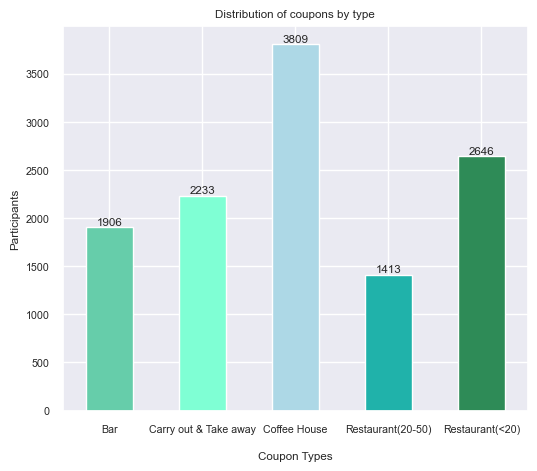

In [29]:
df = data.groupby(['coupon']).size()
sns.set(style="darkgrid",font_scale=0.7)
fig, ax = plt.subplots(figsize=(6, 5))
ax = df.plot(kind='bar',color=['mediumaquamarine', "aquamarine", "lightblue", "lightseagreen", 'seagreen'],\
            xlabel="\nCoupon Types", ylabel="Participants", title="Distribution of coupons by type")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0) 
plt.savefig('images/bar_coupon_types_dist.png')


5.2 Accepted/rejected offers across different coupon types 

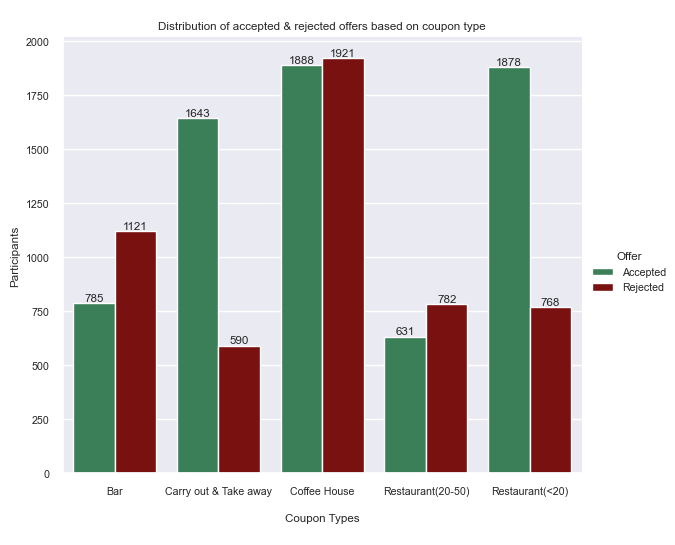

In [30]:
# Merge accepted and rejected tables by coupon category
df = pd.merge( data[data['Y']==1].groupby(['coupon']).size().to_frame(), \
               data[data['Y']==0].groupby(['coupon']).size().to_frame(), \
                left_on='coupon', right_on='coupon', how='outer')
df.rename(columns = {'0_x':'Accepted', '0_y':'Rejected'}, inplace=True);
df.reset_index(inplace=True)
dfm = pd.melt(df, id_vars='coupon', var_name='Offer', value_name='Count')
#fig, ax = plt.subplots(figsize=(6, 7))
sns.set(style="darkgrid",font_scale=0.7)
g = sns.catplot(x='coupon', y='Count', hue='Offer', data=dfm, kind='bar', \
                 height=5, aspect=1.2, palette=["seagreen", "darkred"])
ax = g.axes[0, 0]
ax.set_title('\nDistribution of accepted & rejected offers based on coupon type')
ax.set_xlabel("\nCoupon Types\n")
ax.set_ylabel("Participants")
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('images/bar_accept_reject_coupon_types_dist.png')


6. Use a histogram to visualize the temperature column.

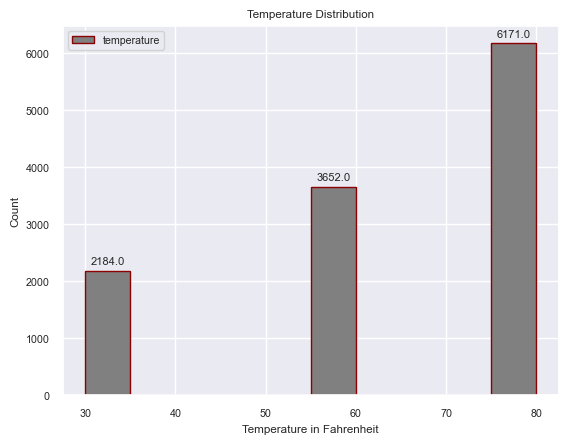

In [31]:

ax = data.plot.hist(column='temperature', color = 'gray', edgecolor='darkred')
ax.set_xlabel("Temperature in Fahrenheit")
ax.set_ylabel("Count")
ax.set_title("Temperature Distribution")
for c in ax.containers:
    labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, fontsize=8, padding=3)

plt.savefig('images/hist_temperature.png')


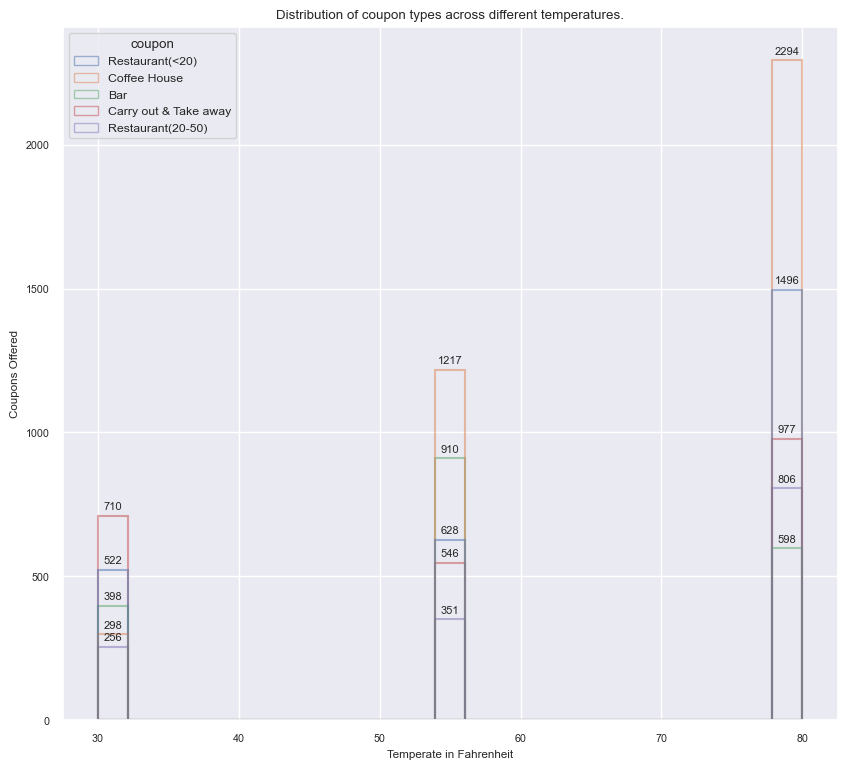

In [32]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.set(style="darkgrid",font_scale=0.8)
ax = sns.histplot(data=data, x='temperature', hue='coupon', ax=ax,  alpha=0.5,fill=False, edgecolor='lightgray')
ax.set_title("Distribution of coupon types across different temperatures.")
ax.set_xlabel("Temperate in Fahrenheit")
ax.set_ylabel("Coupons Offered")
for c in ax.containers:
    labels = [f'{h:0}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, fontsize=8, padding=3)
plt.savefig('images/hist_temperature_coupons_types.png')

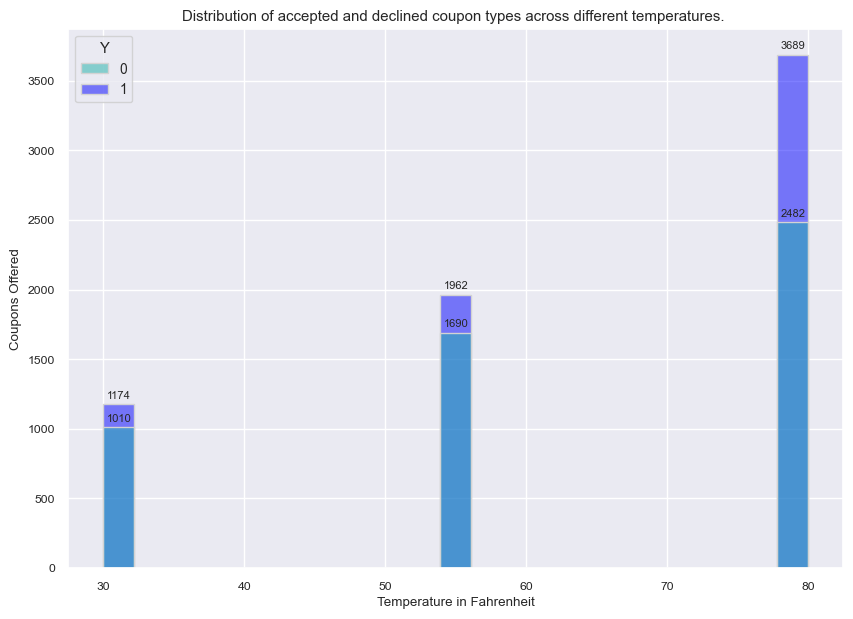

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(style="darkgrid",font_scale=0.9)
sns.histplot(data=data, x='temperature', hue='Y', alpha=0.5,  edgecolor='lightgray', palette=["lightseagreen", "blue"], ax=ax)
ax.set_title("Distribution of accepted and declined coupon types across different temperatures. ")
ax.set_xlabel("Temperature in Fahrenheit")
ax.set_ylabel("Coupons Offered")
for c in ax.containers:
    labels = [f'{h:0}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, fontsize=8, padding=3)
plt.savefig('images/hist_temperature_accept_reject.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [34]:
bar_df = data.query('coupon == "Bar"').coupon.copy(deep=True).to_frame()

# Validate dataframe was created correctly
bar_df.info()
bar_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 24 to 12682
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   coupon  1906 non-null   object
dtypes: object(1)
memory usage: 29.8+ KB


,coupon
24,Bar
35,Bar
39,Bar


2. What proportion of bar coupons were accepted?


In [35]:
print("The portion of bar coupons that were accepted are: \033[1m\033[3m\033[4m" + format(data.query('coupon == "Bar"')['Y'].value_counts()[1] / data.shape[0],".2%")+ '\033[0m')

The portion of bar coupons that were accepted are: 6.54%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
# Assumption - the question is referring to acceptance rate of the "Bar" coupons only

# Group1 - Participants that went to a bar no more than three times are:
group_1 = data.query('coupon == "Bar" & Bar <= 3.0 & Y == 1').Bar.count();

# Group2 - Participants that went to a bar more than three time are: 
group_2 = data.query('coupon == "Bar"  & Bar > 3.0 & Y == 1').Bar.count();

# The ratio between the participants who when to the bar no more than three time to the one who went more than three times 
result = group_1/group_2;

total = data.shape[0]

print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2))
#print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2) + " Total count = " + str(data.shape[0]))
print("\nAcceptance rate of participants that went to a bar no more than three times are: \033[1m\033[3m\033[4m\n\t" + format(group_1/total, ".2%")+ '\033[0m')
print("\nAcceptance rate of participants that went to a bar more than three time are: \033[1m\033[3m\033[4m\n\t" + format(group_2/total, ".2%")+ '\033[0m')
print("\nThe ratio between the participants who when to the bar no more than three time to the one who went more than three times is: \033[1m\n\t" + \
      format(result, ".4")+ '\033[0m')

print("\nThe acceptance rate of participants who when to the bar no more than three time is \033[1m\033[3m\033[4m'~"   + format(result, ".3") + "'\033[0m times than \n\
the participants that went to a bar more than three time.")

Group1 = 638  Group2 = 147

Acceptance rate of participants that went to a bar no more than three times are: 
	5.31%

Acceptance rate of participants that went to a bar more than three time are: 
	1.22%

The ratio between the participants who when to the bar no more than three time to the one who went more than three times is: 
	4.34

The acceptance rate of participants who when to the bar no more than three time is '~4.34' times than 
the participants that went to a bar more than three time.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
# Assumption - the question is referring to acceptance rate of the "Bar" coupon only

# Group1 - Participants (drivers) over the age of twenty five who went to a bar more than once a month are:
group_1 = data.query('(coupon == "Bar") & (Bar > 1.0) & (age > 25) & Y == 1').Bar.count() 

# Group2 Other participants:
group_2 = data.query('((Bar <= 1.0) or (age <= 25)) & Y == 1 & coupon == "Bar"').Bar.count()

# The ratio between drivers who go to a bar more than once a month and are over the age of 25 to the all others are:
result = group_1 / group_2;

# Total count of accepted bar coupons:
total = data.shape[0]
print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2))
#print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2) + " Total count of accepted Bar coupons = " + str(total))
print("\nAcceptance rate of participants (drivers) over the age of twenty five who went to a bar more than once a month are:\
       \033[1m\033[3m\033[4m\n\t" + format(group_1/total,".2%")+ '\033[0m')
print("\nAcceptance rate of all other participants: \033[1m\033[3m\033[4m\n\t" + format(group_2/total,".2%")+ '\033[0m')
print("\nThe ratio between drivers who go to a bar more than once a month and are over the age of 25 to the all others are: \033[1m\033[3m\033[4m\n\t" + \
      str(format(result, ".4"))+ '\033[0m')
print("\nThe acceptance rate of the participants (drivers) who go to a bar more than once a month and are over the age of 25 \
is \nabout \033[1m\033[3m\033[4m'~" + str(Fraction(format(result,"0.1"))) + "'\033[0m times to that of the others. Yes there is a difference, i.e., \
their total rate is the same as the Bar coupon acceptance rate.")

Group1 = 278  Group2 = 507

Acceptance rate of participants (drivers) over the age of twenty five who went to a bar more than once a month are:       
	2.32%

Acceptance rate of all other participants: 
	4.22%

The ratio between drivers who go to a bar more than once a month and are over the age of 25 to the all others are: 
	0.5483

The acceptance rate of the participants (drivers) who go to a bar more than once a month and are over the age of 25 is 
about '~1/2' times to that of the others. Yes there is a difference, i.e., their total rate is the same as the Bar coupon acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [38]:
# Assumption - the question is referring to acceptance rate of the "Bar" coupon only

# Group1 - Participants (drivers) who go to bars more than once a month and had passengers that were not a kid
group_1 = data.query('(coupon == "Bar") & (Bar > 1.0) & (passanger != "Kid") & Y == 1').Bar.count()

# Group2 - Participants (drivers) who go to bars more than once a month and had occupations other than farming, fishing, or forestry:
group_2 = data.query('(coupon == "Bar") & (Bar > 1.0) & (occupation != "FarmFishForestry") & Y == 1').Bar.count()

# The ratio:
result = group_1 / group_2;

# Total count of accepted bar coupons:
total = data.shape[0]
print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2))
#print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2) + " Total count of accepted Bar coupons = " + str(total))
print("\nAcceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid: \033[1m\033[3m\033[4m\n\t" \
      + format(group_1/total,".2%") + '\033[0m')
print("\nAcceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid \n\
and had occupations other than farming, fishing, or forestry: \033[1m\033[3m\033[4m\n\t" + format(group_2/total,".2%") + '\033[0m')
print("\nThe ratio between the two: \033[1m\033[3m\033[4m\n\t" + format(result, ".4") + '\033[0m')

print("\nThe acceptance rate of the participants (drivers) who go to bars more than once a month and had passengers \nthat were not a kid \
is about \033[1m\033[3m\033[4m'" + "~" + str(Fraction(format(result,"0.1"))) + \
"'\033[0m times to that of drivers that had occupations other than farming, fishing, or forestry.")

Group1 = 376  Group2 = 392

Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid: 
	3.13%

Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid 
and had occupations other than farming, fishing, or forestry: 
	3.26%

The ratio between the two: 
	0.9592

The acceptance rate of the participants (drivers) who go to bars more than once a month and had passengers 
that were not a kid is about '~1' times to that of drivers that had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [39]:
# Assumption - the question is referring to acceptance rate of the "Bar" coupon only
# Drivers who 
# Group1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed:
group_1 = data.query('(coupon == "Bar") & (Bar > 1.0) & (passanger != "Kid") & (maritalStatus != "Widowed") & Y == 1').passanger.count()

# Group2 - go to bars more than once a month and are under the age of 30 
group_2 = data.query('(coupon == "Bar") & Bar > 1.0 & age < 30 & Y == 1').passanger.count()
 
# Group3- go to cheap restaurants more than 4 times a month and income is less than 50K.
group_3 = data.query('(coupon == "Bar") & RestaurantLessThan20 > 4.0 & income < 50 & Y == 1' ).passanger.count()

print( "Group1 = " + str(group_1) + "\tGroup2 = " + str(group_2) + "\tGroup3 = " + str(group_3))
#print( "Group1 = " + str(group_1) + "\tGroup2 = " + str(group_2) + "\tGroup3 = " + str(group_3)  + "\tSample Size = " + str(data.shape[0])) 
print("\nThe acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: \033[1m\033[3m\033[4m\n\t" + format(group_1/data.shape[0],".2%")+'\033[0m')
print("\nThe acceptance rate of the drivers who go to bars more than once a month and are under the age of 30: \033[1m\033[3m\033[4m\n\t" + format(group_2/data.shape[0],".2%")+'\033[0m')
print("\nThe acceptance rate of the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: \033[1m\033[3m\033[4m\n\t" + format(group_3/data.shape[0],".2%") +'\033[0m')

print("\nThe acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, \nand were not widowed is about \033[1m\033[3m\033[4m'~" + format(group_1/group_2, ".2") + \
      "'\033[0m times more to that of the drivers that go to bars more than once a month and are under the age of 30.")

print("\nThe acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed \n\
is about \033[1m\033[3m\033[4m'~" + format(group_1/group_3,".2") + \
      "'\033[0m times more to that of drivers that go to cheap restaurants more than 4 times a month and income is less than 50.")

print("\nThe acceptance rate of the drivers who go to bars more than once a month and are under the age of 30 is \033[1m\033[3m\033[4m'~" + format(group_2/group_3,".2") + \
      "'\033[0m time to that of drivers \nthat go to cheap restaurants more than 4 times a month and income is less than 50.")

Group1 = 376	Group2 = 236	Group3 = 152

The acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 
	3.13%

The acceptance rate of the drivers who go to bars more than once a month and are under the age of 30: 
	1.97%

The acceptance rate of the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 
	1.27%

The acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, 
and were not widowed is about '~1.6' times more to that of the drivers that go to bars more than once a month and are under the age of 30.

The acceptance rate of the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
is about '~2.5' times more to that of drivers that go to cheap restaurants more than 4 times a month and income is less than 50.

The acceptance rate of the drivers who go to bars more than once a m

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

        My hypothesis is as follows:

        [Assumption:  the question is asking for hypothesis against section 6.]


        7.1 Definition
    
        a) Dependent variable: Drivers, who accepted bar coupons, go to bars more than once a month.
    
        b) Group 1 of population:  had passengers that were not a kid and were not widowed
    
        c) Group 2 of population:  are under the age of 30



        7.2 Statical Test - Two-proportions z test 
    
        a) Proportion Group 1 (P1) - Drivers, who accepted bar coupons,  go to bars more than once a month, had passengers that were not a kid, and were not widowed.
    
        b) Proportion Group 2 (P2) - Drivers, who accepted bar coupons,  go to bars more than once a month and are under the age of 30


        7.3 Hypothesis:
    
        a) Null hypothesis (Ho) - (P1 EQUALS P2)
    
        d) Alternative hypothesis (Ha) - ((P1 NOT_EQUALS P2))



        7.4 Test:
        Please see the following cells for the test/results.


In [40]:
# Hypothesis Testing With Two Proportions:
alpha = 0.05
Aleft = alpha + 0.95
# X1 - Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:
X1 = data.query('(coupon == "Bar") & (Bar > 1.0) & (passanger != "Kid") & (maritalStatus != "Widowed") & Y == 1').passanger.count()
# X2 - Drivers who go to bars more than once a month and are under the age of 30
X2 = data.query('(coupon == "Bar") & Bar > 1.0 & age < 30 & Y == 1').passanger.count()
# Number of samples
N = data.shape[0]

P1_Hat = X1/N
P2_Hat = X2/N

# Sample size is much larger than 30,use normal distribution per Central Limit Theorem.
# Cumulative from the left area up to the the start of the rejection area (which starts at 0.025)
Al = alpha + 0.95

# The critical Z values separates the "rejection" regions (which are the two tail ends of the normal distribution curve) from the "fail to reject" region (the center region of the normal distribution). 
# The critical Z value derived from the positive Z table (adding the row and column values that correspond to the cell value of 0.975)
Zc = 1.96

# Calculate Z values; assume Null Hypothesis (p1 == p2, i.e., p1 - p2 == 0)
P_Hat = (X1 + X2)/(N*2)
Z = (P1_Hat - P2_Hat)/(np.sqrt((P_Hat*(1-P_Hat))*(2/N)))


print( "P1_Hat: " + str(P1_Hat) + "    P2_Hat: " + str(P2_Hat))
print( "P_Hat: " + str(P_Hat) + "    Z: " + str(Z))

if np.absolute(Z) > Zc:
    print("The null hypothesis (Ho) is rejected because Z value falls in the reject region (which is < -1.96 or > 1.96).")
else:
    print("The null hypothesis (Ho) is is accepted.")

P1_Hat: 0.031315066211376696    P2_Hat: 0.019655201132672606
P_Hat: 0.02548513367202465    Z: 5.7326851513271535
The null hypothesis (Ho) is rejected because Z value falls in the reject region (which is < -1.96 or > 1.96).


        7.5 Results:
        
        Given the result above, the null hypothesis (Ho) is rejected and alternative hypothesis (Ha) is accepted. The ration between Group 1 and Group 2 is ~1.6; in other words, 
        Group 1 is 1.6 times more likely to go to bars more than once a month.
        
        Note: For description of groups, please see notes in cells above.  


### 8. Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

8.1 Strategy


a) Study the "CarryAway" coupon type to help identify opportunities to improve coupon acceptance rate.

b) Base on the correlation results, identify the characteristics/features of the passenger/driver who accepted the coupon.

c) Identify opportunities to increase acceptance rate by examining the conditional probability of acceptance/rejections; where the conditions derived base on the combination of one or more characteristics/features of the driver/passenger.

Note: the conditional probability of acceptance will be presented visually.

8.2   Identify attributes associated with passenger's/driver's characteristics "CarryAway" coupon. 

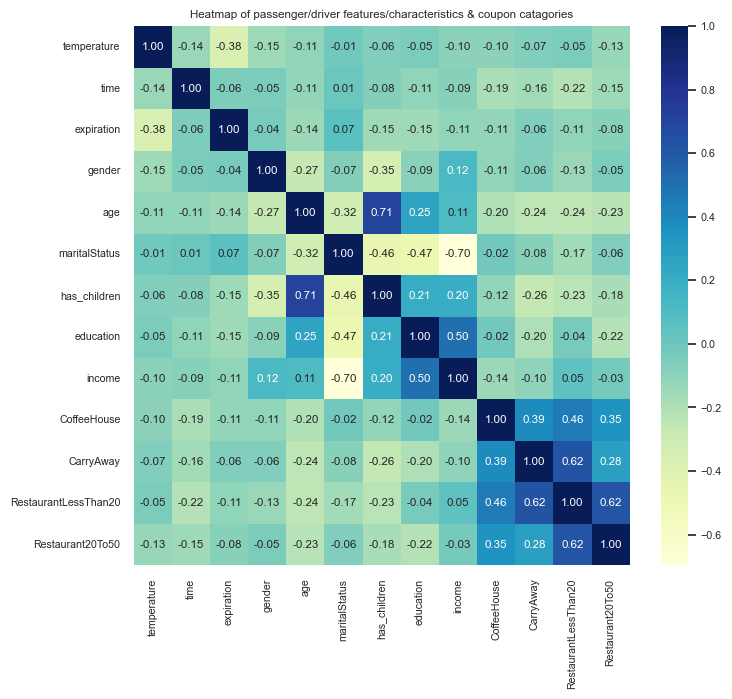

In [54]:
# Convert attributes of type objects to int and store in a copy of the original dataframe, in order to understand the correlation between them.
df = data.copy(deep=True)

# Convert gender
df.replace(({'gender': {'Female':0,'Male':1}}), inplace=True)

# Convert maritalStatus
dict = {'Married partner':1, 'Single':2, 'Unmarried partner':3, 'Divorced':4, 'Widowed':5}
df.replace({'maritalStatus': dict},inplace=True)

# Convert education
dict = {'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5, \
        'Graduate degree (Masters or Doctorate)':6}
df.replace({'education': dict},inplace=True);

# Lets view the correlation between the attributes and coupon catagories
# Reduced the list of attributes to the onces of interest and avoid creating a busy view that would be challenging to read.
# Note: Bar attribute was not include for correlation, since it is not of interest.

fig, ax = plt.subplots(figsize=(8, 7))
df1 = df.query('Y == 1').copy(deep=True)
dfv = df1[['temperature', 'time', 'expiration','gender','age','maritalStatus','has_children','education', \
'income','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].corr(numeric_only=True)
sns.set(style="darkgrid",font_scale=0.7)
sns.heatmap(dfv.corr(), cmap="YlGnBu", annot=True, fmt="0.2f")
ax.set_title("Heatmap of passenger/driver features/characteristics & coupon catagories")
plt.savefig('images/heatmap_attributes_coupons.png')


    8.2.1 Observation from correlation visual data

    The moderate negative correlation could be an indication that the technique use for transformation of the attributes from string to integer/float may have introduced unintended anomalies, skewing the heatmap. For example, the "maritalStatus" attribute may not have been transformed correctly (i.e., data type has no defined order). One-hot-encoding is a powerful technique that can be used to treat categorical data, but it can lead to increased dimensionality, sparsity, and over-fitting.

    From the correlation data, the attributes selected for study are:

    a) income

    b) maritalStatus

    c) has_children

    d) education

    e) age

    f) occupation

    Next, lets understand the relationship between passenger types the selected attributes.

In [55]:
# Before proceeding with the investigation, set the titles of the columns so that they are displayed in a meaningful way and easy to read.
df = data.copy(deep=True)
df.columns = map(lambda col: str(col).capitalize(), df.columns)
df.rename(columns={'Coupon':'CouponType', 'Time':'Time (24-Hours)', 'Maritalstatus':'MaritalStatus', 'Has_children':'Children', \
                   'Income':'Income (1K USD)'}, inplace = True);


8.2.2  Given population of accepted coupon of type "CarryAway", determine the relationship between passenger & income/education/age/children/marital status attributes

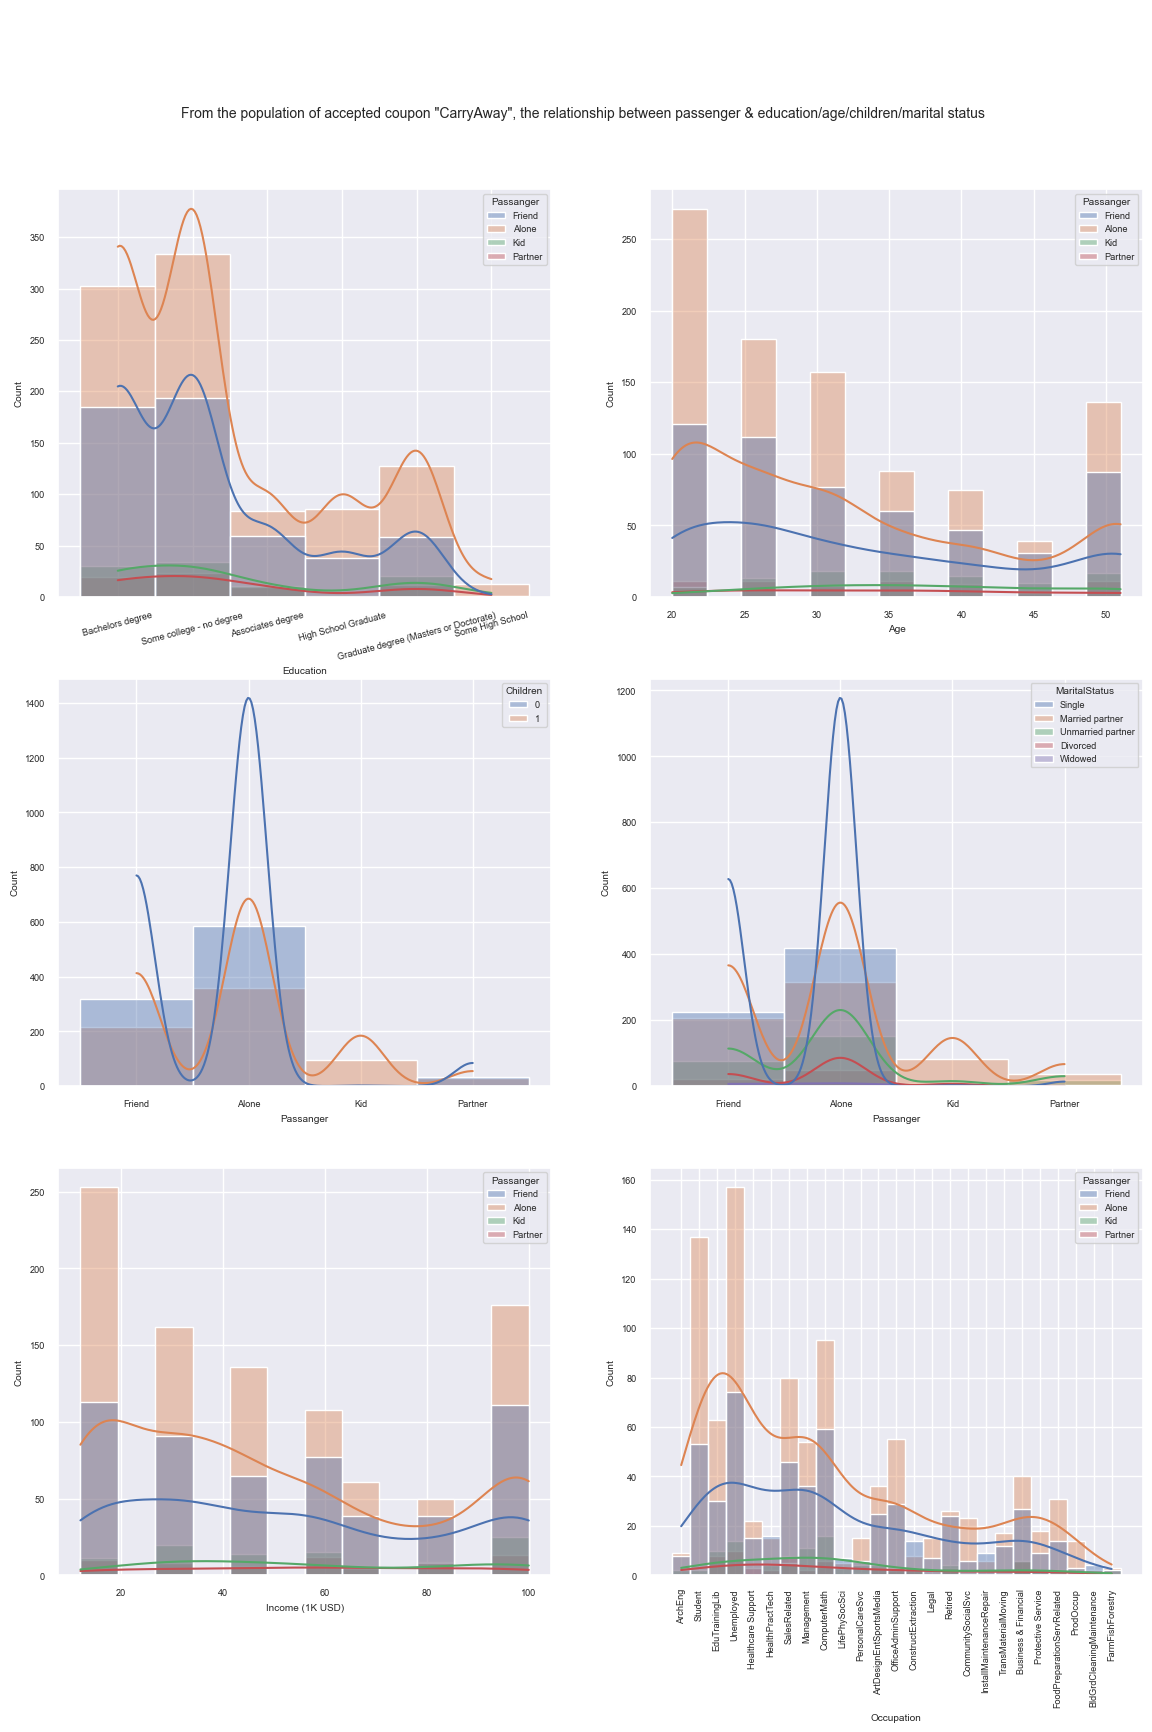

In [60]:
# Generate plots to show the following:
# From the population of accepted coupon "CarryAway", the relationship between Passenger & Education/Age/Children/MaritalStatus
#
dfv = df.query('Y == 1 & CouponType == "Carry out & Take away"')

sns.set(style="darkgrid",font_scale=0.6)
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

g1 = sns.histplot(data=dfv, x="Education", hue="Passanger", kde=True, color="olive", alpha=0.4, ax=axs[0, 0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=15)
sns.histplot(data=dfv, x="Age", hue="Passanger", kde=True, color="olive", alpha=0.4, ax=axs[0, 1])
sns.histplot(data=dfv, x="Passanger", hue="Children", kde=True, color="olive", alpha=0.4, ax=axs[1, 0])
sns.histplot(data=dfv, x="Passanger", hue="MaritalStatus", kde=True, color="olive", alpha=0.4, ax=axs[1, 1])
sns.histplot(data=dfv, x="Income (1K USD)", hue="Passanger", kde=True, color="olive", alpha=0.4, ax=axs[2, 0])
g2=sns.histplot(data=dfv, x="Occupation", hue="Passanger", kde=True, color="olive", alpha=0.4, ax=axs[2, 1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
sns.set(style="darkgrid",font_scale=0.7)
fig.suptitle('\n\n\n\n\n\nFrom the population of accepted coupon "CarryAway", the relationship \
between passenger & education/age/children/marital status');
plt.savefig('images/histplot_accepted_carryaway_passanger_attributes.png')
plt.show()
plt.close()


    8.2.3 Observation from the histogram plots in section 8.2.2


    From the plots above, attributes observed to have independently-highest acceptance are:

    a) Passange Type  - Alone

    b) Education (top 2) - Some College or Bachelors

    c) Age - < 37 years of age

    d) Marital Status - Single

    e) Income - (< 20K) followed by (90K - 100K) followed by (30K - 55K). When grouped, majority would fall in the range of 10k - 55K & 90K - 100K

    f) Occupation (top 4) - Student, Unemployed, ComputerMath, SalesRelated



8.2.4  Examine the probability of accepting/rejecting CarryAway coupon given the user's/driver's occupation, income, education, and marital status features. These features will be examined as independent conditions.


In [66]:
#----------------------------------------------------------------------------------------
# Lets first define a function to:                                                      |
# a) calculate the probability of acceptance per the feature as a condition             |
# b) generate a plot that presents the calculated probability per feature type          |
#----------------------------------------------------------------------------------------
# This function plots the condition probability of accepting or rejecting coupon offer. |
# It takes the following arguments:                                                     |
#       DataFrame - df                                                                  |
#       Feature - attr                                                                  |
#       Coupon Type - ctype                                                             |
#----------------------------------------------------------------------------------------
def plot_con_prob_func(df, attr, ctype):
    total = df.groupby([attr]).size().to_frame() 

    dfy = pd.merge( df.query('Y == 1 & CouponType == ' + ctype).groupby([attr]).size().to_frame()/total, \
               df.query('Y == 0 & CouponType == ' + ctype).groupby([attr]).size().to_frame()/total, \
                left_on=attr, right_on=attr, how='outer')
    dfy.rename(columns = {'0_x':'Accepted', '0_y':'Rejected'}, inplace=True);
    dfy.reset_index(inplace=True)
    dfm = pd.melt(dfy, id_vars=attr, var_name='Offer', value_name='Count')
    dfm['Count'] = dfm['Count'].apply(lambda x: round(x, 2))
    sns.set(font_scale=0.9) 
    grid = sns.catplot(x=attr, y='Count', hue='Offer', data=dfm, kind='bar', height=5, aspect=2.7, \
                       palette=["seagreen", "darkred"])
    ax = grid.axes[0, 0]
    for container in ax.containers:
        ax.bar_label(container)
    plt.xlabel(attr) 
    plt.xticks(rotation=60) 
    plt.ylabel("Probability") 
    sns.set(style="darkgrid",font_scale=1)
    plt.title('Probability of accepting & rejecting offers base on ' + attr);
    plt.savefig('images/catplot_accept_reject_' + attr + '.png');
    return 
#
# -----------------------------End of function definition--------------------------------







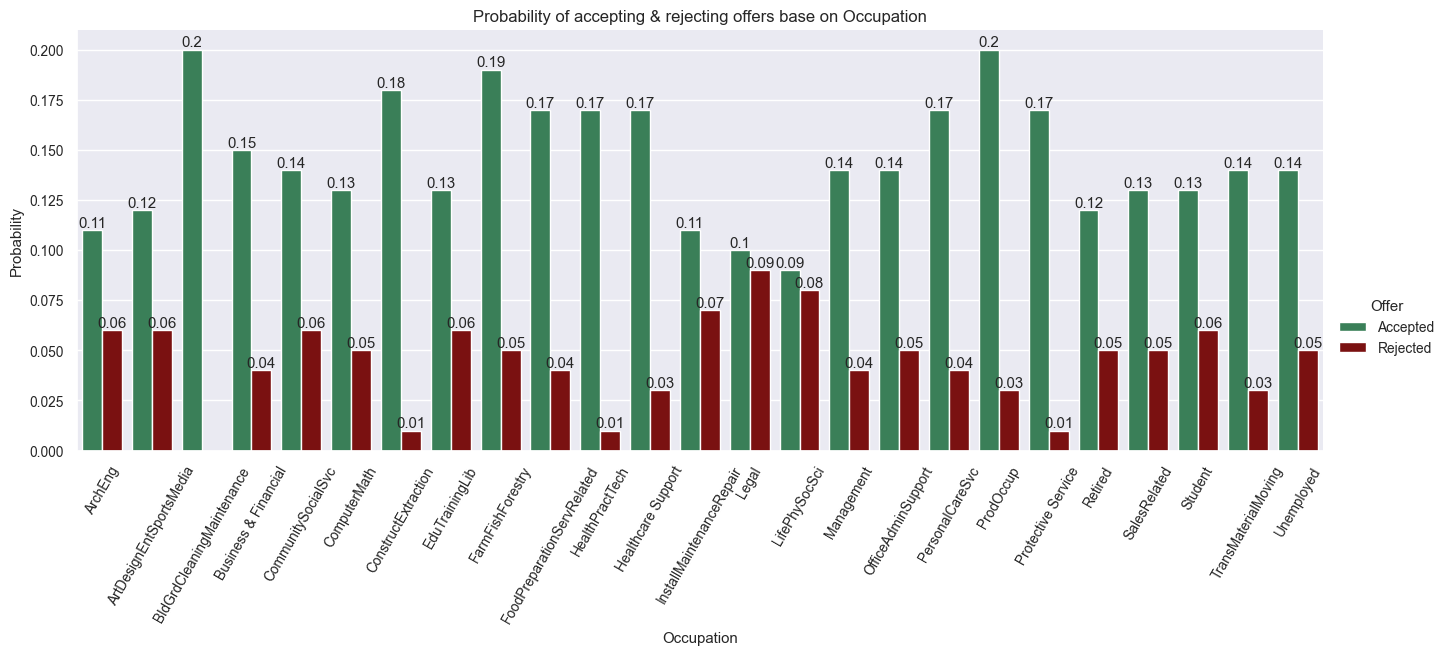

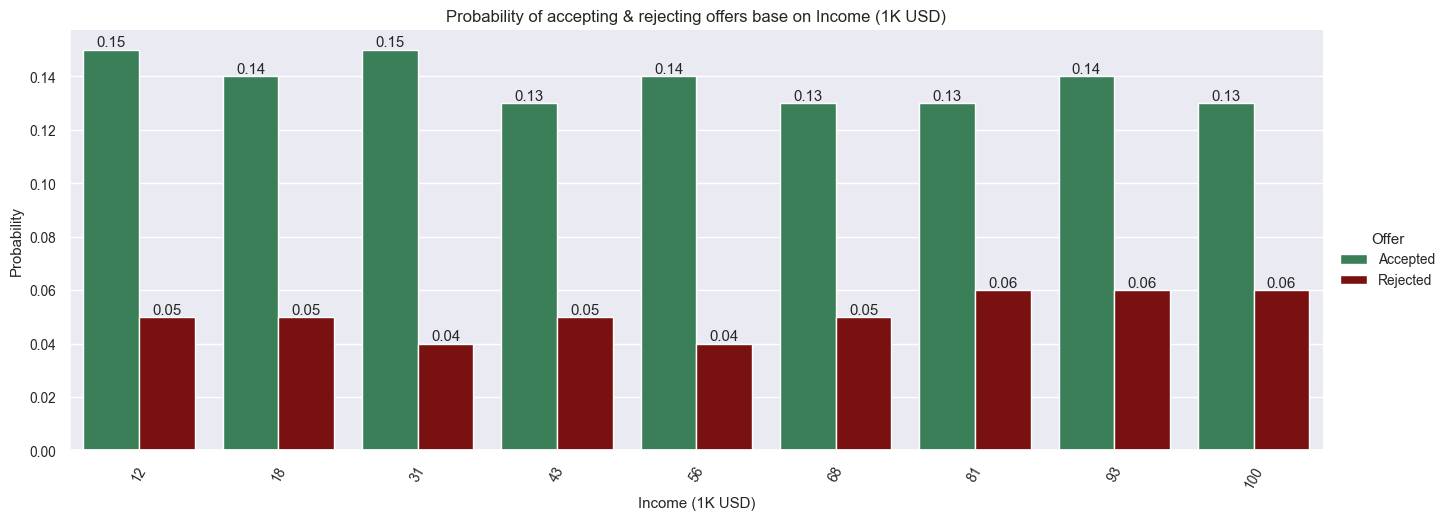

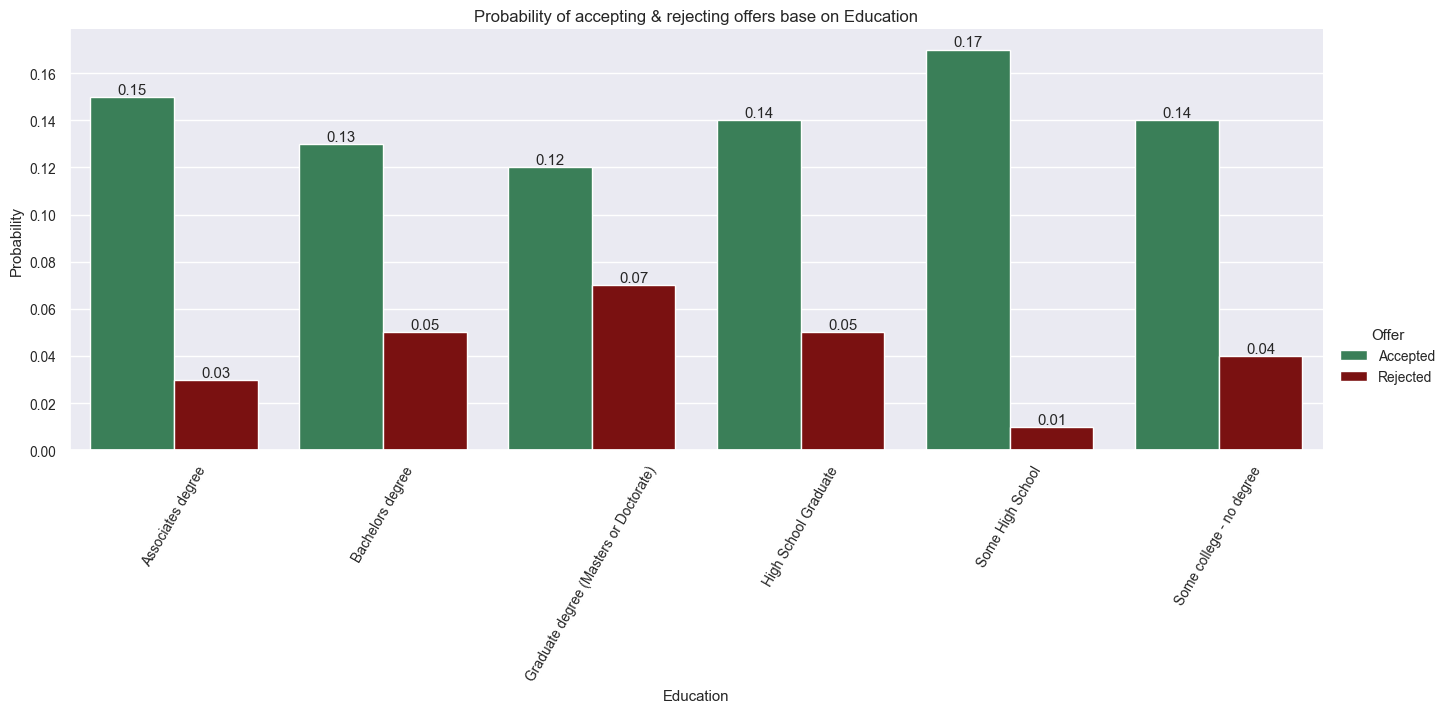

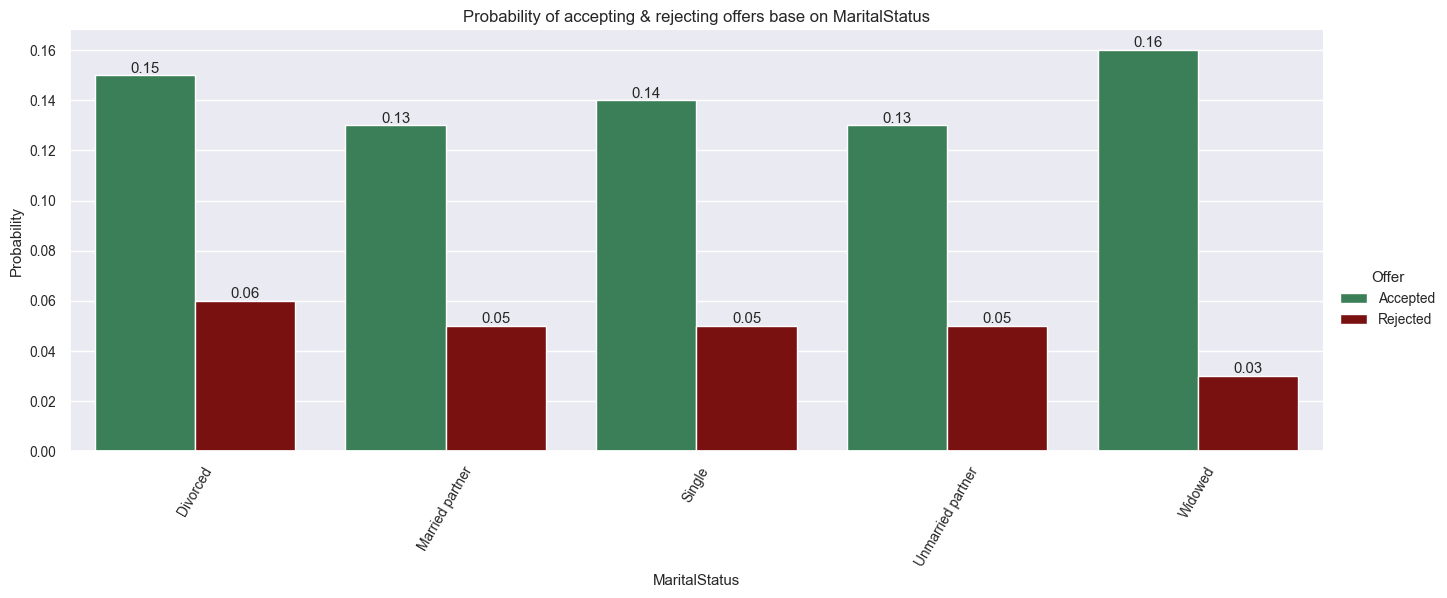

In [67]:

# Iterate through the list of conditions, calling the function to calculate the conditional 
# probability and generate conditional probability plots
couponType = '"Carry out & Take away"';
list(map(lambda attr, ctype: plot_con_prob_func(df, attr, ctype), \
         ['Occupation', 'Income (1K USD)', 'Education', 'MaritalStatus'], \
         [couponType, couponType, couponType, couponType]));
plt.show()
plt.close()

    8.2.5 Observation from the conditional probability plots in section 8.2.4

    Per the plots, the following is observed:

    a) Occupation:
    The types that had the highest acceptance and the lowest rejections are (in no specific order):
    1. Protective Services [0.17, 0.01]
    2. HealthPractTech [0.17, 0.01]
    3. ConstructExtraction [0.18, 0.01]
    4. BldGndCleaningMaintenance [0.2, ~0.0]
    5. ProdOccup [0.2, 0.03]
    Note: Selected top five.

    b) Income:
    The ranges that had the highest acceptance and the lowest rejections are (in no specific order):
    1. ~$12K [0.15, 0.05], ~18K [0.14, 0.05], ~31K [0.15, 0.04]
    2. ~56K [14, 0.04]
    Note: Selected top four

    c) Education:
    The education level that had the highest acceptance and the lowest rejections are (in no specific order):
    1. Some Highschool [0.17, 0.01]
    2. Associate degree [0.15, 0.03]
    Note: Selected top two

    d) MaritalStatus
    Marital status that had the highest acceptance and the lowest rejections are (in no specific order):
    1.Widowed [0.16, 0.03]

    The conditional probability plot has provided very insightful findings.  Based on these find, complex conditionals will be defined 
    to understand the interrelationship between these participants with the top acceptance.



8.3 Identify opportunities to increase acceptance rate 

    

    

8.3.1  Based on the observation in section 8.2.5 and taking into account findings in section 8.2.3, define possible opportunities and identify attribute to execute complex conditional probability based the analysis

The attributes identified in section 8.2.3 has relatively higher probability of rejection to the attributes identified in section 8.2.5. This means that there are two approaches that can be taken to improve the chances to
increasing the acceptance rate:

a) reduce the rate of rejection in the attributes identified in section 8.2.3

OR / AND

b) given a high acceptance relative to the rejection rate, increase the number of offers to the population with attributes identified in section 8.2.5. 


Following are the refined attributes to investigate (as an example approach):

        A - Passanger Type - Alone

        B - Education - Some College or Bachelors or Graduate degree

        C - Age - < 37 years of age

        D - Occupation - Unemployed or Student

        E - Marital Status - Single or Divorced

        F - Combination - (Single or Divorced) and (Unemployed)

        G - Combination - (Single or Married) & (Bachelors or Graduate degree) & (< 37 years of age)


Note: This is an example to demonstrate the strategy behind selection of these attributes and the combination is to understand the key characteristics to help drive down the rejection rate.   


8.3.2  Before proceeding with complex conditional probability analysis, lets address a few business questions.

8.3.2.1  What proportion of CarryAway coupons were accepted?

In [68]:
print("The portion of bar coupons that were accepted are: \033[1m\033[3m\033[4m" + format(df.query('CouponType == "Carry out & Take away"')['Y'].value_counts()[1] / df.shape[0],".2%")+ '\033[0m')

The portion of bar coupons that were accepted are: 13.68%


8.3.2.2 Compare the CarrAway coupon acceptance rate between drivers who carry out more than twice a month and are single to the all others (who accepted carryAway coupon).  

In [69]:
# Group1 - drivers who carry out more than twice a month and are are single 
group_1 = df.query('Y==1 & (CouponType == "Carry out & Take away") & (Carryaway > 2.0 & MaritalStatus == "Single")').Carryaway.count()

# Group2 All other participents who accepted the CarrAway coupon 
group_2 = df.query('Y == 1 & (CouponType == "Carry out & Take away")').Carryaway.count() - group_1

# The acceptance rate of group 1 to group 2:
result = group_1 / group_2;


print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2))
print("\nThe acceptance rate of group 1 to group 2 is: \033[1m\n\t" + str(Fraction(format(result,"0.1"))) + '\033[0m')

Group1 = 318  Group2 = 1325

The acceptance rate of group 1 to group 2 is: 
	1/5


8.3.2.3 Compare the CarrAway coupon acceptance rate between drivers who carry out one or more time a month and have an occupation of Student or ComputerMath or SalesRelated or are Unemployed to the all others (who accepted carryAway coupon).

In [70]:
# Group1 - drivers who carry out one or more time a month and have an occupation of Student or ComputerMath or SalesRelated or are Unemployed 
group_1 = df.query('Y==1 & (CouponType == "Carry out & Take away") & (Carryaway > 0.0) & \
                   (Occupation == "Unemployed" or Occupation == "Student" or Occupation == "ComputerMath" or Occupation == "SalesRelated") ').Carryaway.count()

# Group2 All other participants who accepted the CarrAway coupon 
group_2 = df.query('Y == 1 & (CouponType == "Carry out & Take away")').Carryaway.count() - group_1

# The acceptance rate of group 1 to group 2:
result = group_1 / group_2;

print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2))
print("\nThe acceptance rate of group 1 to group 2 is: \033[1m\n\t" + str(Fraction(format(result,"0.1"))) + '\033[0m')

Group1 = 749  Group2 = 894

The acceptance rate of group 1 to group 2 is: 
	4/5


8.3.2.4 Compare the CarrAway coupon acceptance rate between drivers who have some College or bachelors degree to the one who have an occupation of Student or ComputerMath or SalesRelated or are Unemployed .

In [71]:
# Group1 who have some College or bachelors degree 
group_1 = df.query('Y==1 & (CouponType == "Carry out & Take away")  & \
                   ((Education == "Some college - no degree") or (Education == "Bachelors degree")) ').Carryaway.count()

# Group2 - drivers who have an occupation of Student or ComputerMath or SalesRelated or are Unemployed 
group_2 = df.query('Y==1 & (CouponType == "Carry out & Take away") & \
                   (Occupation == "Unemployed" or Occupation == "Student" or Occupation == "ComputerMath" or Occupation == "SalesRelated") ').Carryaway.count()

# The acceptance rate of group 1 to group 2:
result = group_1 / group_2;

print( "Group1 = " + str(group_1) + "  Group2 = " + str(group_2))
print("\nThe acceptance rate of group 1 to group 2 is: \033[1m\n\t" + format(result, ".4")+ '\033[0m')

Group1 = 1121  Group2 = 763

The acceptance rate of group 1 to group 2 is: 
	1.469










8.4 Complex conditional probabilities - investigation the characteristics identified in section 8.2.1



8.4.1 Define functions to automate complex conditional probabilities calculation and visualization  

In [86]:
#----------------------------------------------------------------------------------------
# This function calculates condition probability of accepting or rejecting coupon offer. |
#----------------------------------------------------------------------------------------
# It takes the following arguments:                                                      |
#       DataFrame - df                                                                   |
#       Feature - attr                                                                   |
#       Condition - con                                                                  |
#                                                                                        |
# Returns: DataFrame                                                                     |
#----------------------------------------------------------------------------------------
def multPlusCon_prob_func(df, attr, con):
    total = df.query(con).groupby([attr]).size().to_frame() 

    dfy = pd.merge( df.query('Y == 1 & ' + con).groupby([attr]).size().to_frame()/total, \
               df.query('Y == 0  & ' + con).groupby([attr]).size().to_frame()/total, \
                left_on=attr, right_on=attr, how='outer')
    dfy.rename(columns = {'0_x':'Accepted', '0_y':'Rejected'}, inplace=True);
    dfy.reset_index(inplace=True)
    dfm = pd.melt(dfy, id_vars=attr, var_name='Offer', value_name='Count')
    dfm['Count'] = dfm['Count'].apply(lambda x: round(x, 2))
  
    return dfm

#----------------------------------------------------------------------------------------------
# This function plots calculated condition probability of accepting or rejecting coupon offer. |
#----------------------------------------------------------------------------------------------
# It takes the following arguments:                                                            |
#       List of DataFrame - df_col                                                             |
#       List of Conditions - con                                                               |
#       Coupon Type - ctype                                                                    |
#----------------------------------------------------------------------------------------------
def plot_con_prob_func(df_col, con, ctype):
    fig, ax = plt.subplots(4, 2, figsize=(17,18))
    k = 0
    breakpoint
    sns.set(font_scale=0.8) 
    for i in range(4):  
        for j in range(2):
            if k >= len(df_col): break
            g = sns.barplot(x=ctype, y='Count', hue='Offer', alpha=0.9, data=df_col[k],  \
                       palette=["seagreen", "darkred"], ax=ax[i, j])
            for container in g.containers:
                g.bar_label(container)
            #g.set_xticklabels(g.get_xticklabels(), rotation=10)
            g.set_ylabel("Probability") 
            g.set_xlabel("") 
            txt = '\nCondition: ' + con[k]
            g.set_title('\n'.join(textwrap.wrap(txt, 80, break_long_words=False)));
            k = k + 1
    sns.set(font_scale=0.8) 
    plt.suptitle('\n\n\n\nCoupon acceptance & rejection rates based on a given condition.');
    plt.savefig('images/histplot_complex_con_probability_coupon_attributes.png')

    return


    8.4.2  Plot acceptance probability of coupons given the following conditionals:

    Identified in section 8.2.1, following conditions are defined:

        A - Coupon acceptance rate per condition

        B - Passanger Type - Alone

        C - Education - Some College or Bachelors or Graduate degree

        D - Age - < 37 years of age

        E - Occupation - Unemployed or Student

        F - Marital Status - Single or Divorced

        G - Combination - (Single or Divorced) and (Unemployed)

        H - Combination - (Single or Married) & (Bachelors or Graduate degree) & (< 37 years of age)

        I - Combination - (Single or Divorced) & (Bachelors or Graduate degree) & (< 37 years of age)

    To evaluate:

        1. P(A|B)

        2. P(A|C)

        3. P(A|D)

        4. P(A|E)

        5. P(A|F)

        6. P(A|G)

        7. P(A|H)

        8. P(A|I)



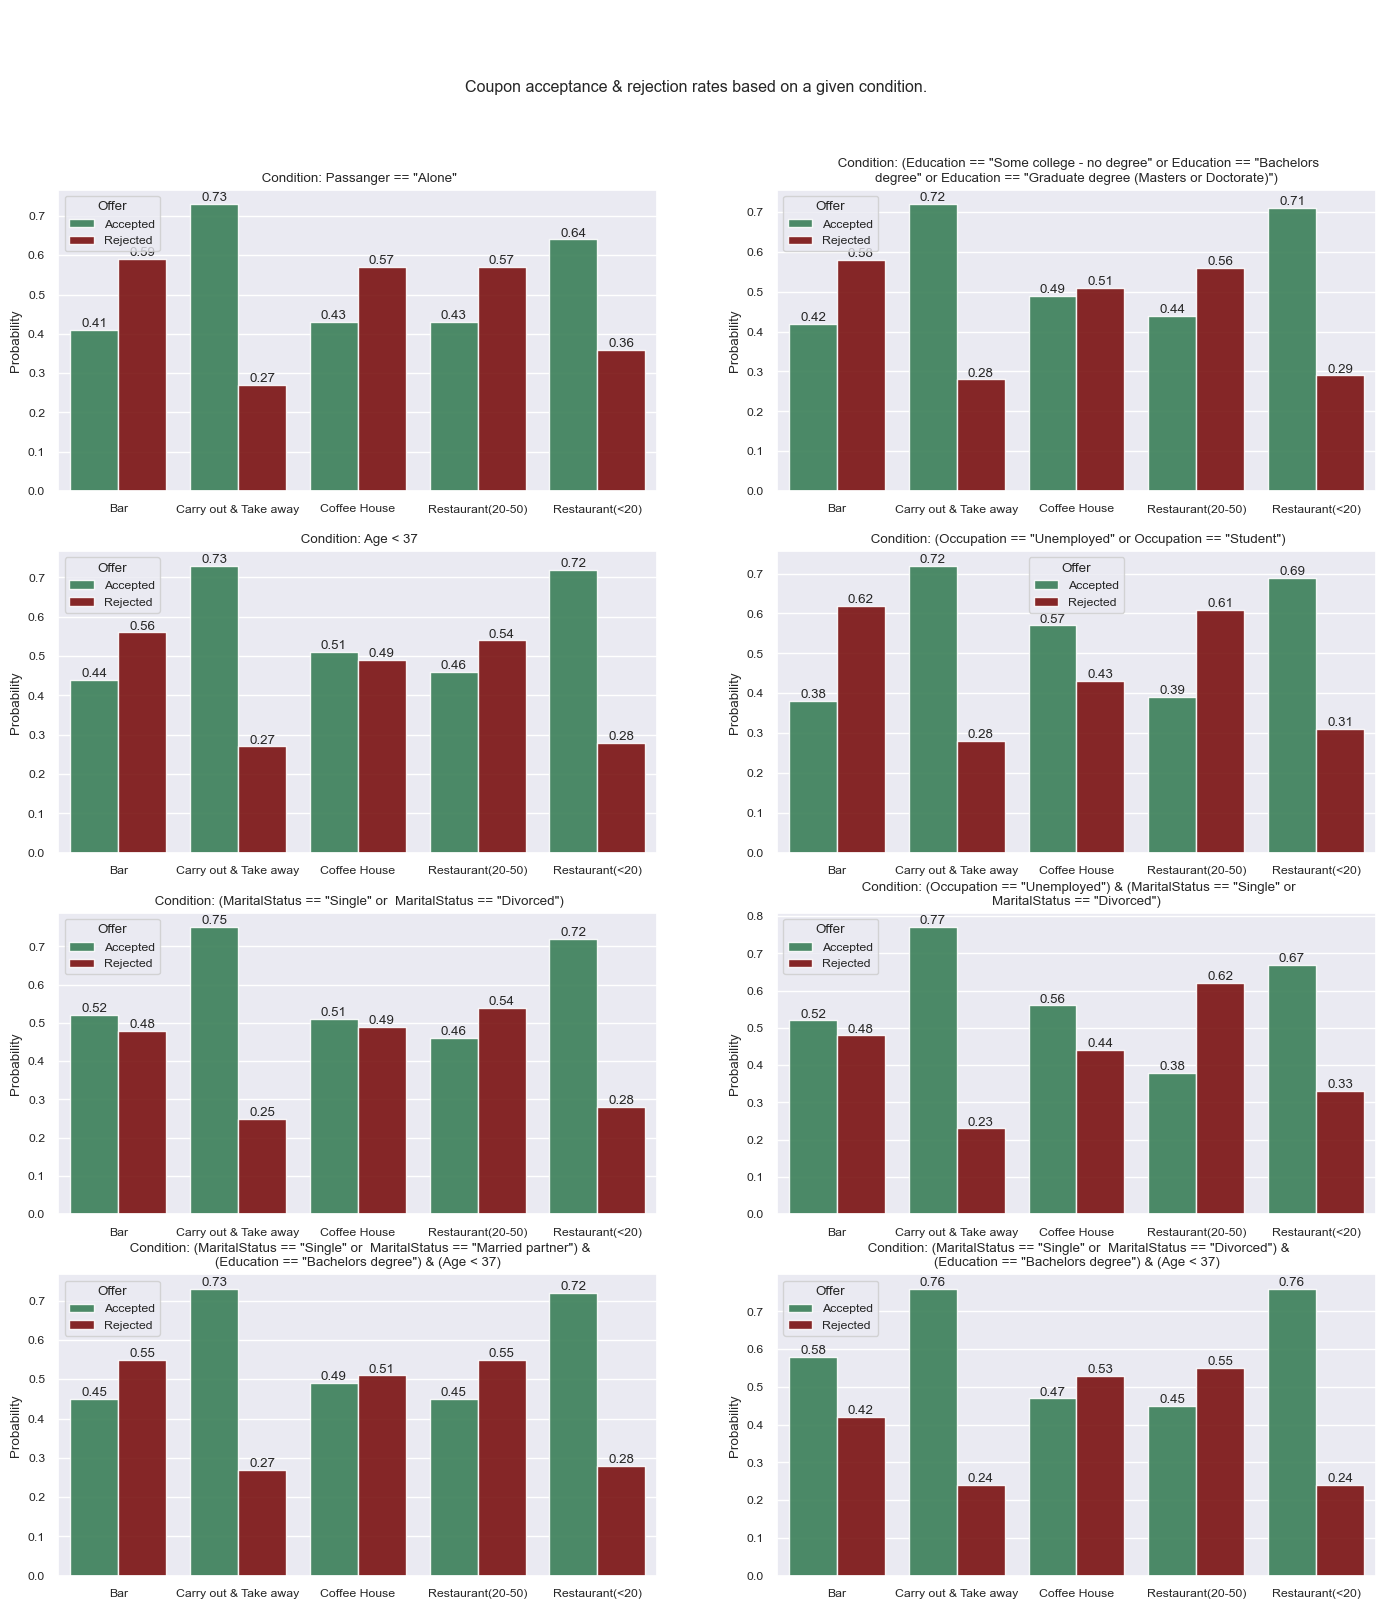

In [87]:
# Define the conditions
B = 'Passanger == "Alone"'
C = '(Education == "Some college - no degree" or Education == "Bachelors degree" or Education == "Graduate degree (Masters or Doctorate)")';
D = 'Age < 37'
E = '(Occupation == "Unemployed" or Occupation == "Student")'
F = '(MaritalStatus == "Single" or  MaritalStatus == "Divorced")'
G =  '(Occupation == "Unemployed") & (MaritalStatus == "Single" or  MaritalStatus == "Divorced")'
H = '(MaritalStatus == "Single" or  MaritalStatus == "Married partner") & (Education == "Bachelors degree") & (Age < 37)'
I = '(MaritalStatus == "Single" or  MaritalStatus == "Divorced") & (Education == "Bachelors degree") & (Age < 37)'

df_collection = []
con = [B, C, D, E, F, G, H, I]
attr = 'CouponType'

# Calculate conditional probability
list(map(lambda con: df_collection.append(multPlusCon_prob_func(df, attr, con)), con));


# Plot results
plot_con_prob_func(df_collection, con, attr)


## Summary of figure above:



The conditional probability plots in section 8.2.4 provide insightful information. The results can be viewed from two angles:
a) likelihood of acceptance of CarryAway relative to other coupon types, given a single driver/passenger characteristics
b) likelihood of acceptance of CarryAway relative to other coupon types, given a combination of driver/passenger characteristics

The first subplot which is the output of a single driver/passenger characteristic condition ("Passange == Alone") yields a lower likelihood of acceptance 0.73 compared to the last subplot where the condition takes multiple driver/passenger characteristics into account (complex condition), with a likelihood of 0.76.  The last two subplots, based on complex condition, yields a difference of 0.03 acceptance likelihood. This shows that it is important to understand the interrelationship between the driver/passenger characteristics to derive the right combination, maximizing the acceptance rate of the coupon campaign. 

This approach will allow the business to define the right target audience, if they decide to increase the number of coupons distribution. They can take the approach of (right mix of driver/passenger characteristics) distribution, proportional to the coupon category.  In other words, the coupon distribution campaign will be targeted to participants who fit the defined combination of driver/passenger characteristics. This inturn will reduce wastage in coupon production and distribution overhead costs while maximizing acceptance rate revenue. 

Additionally, to further improve the acceptance rate, the analysis based on complex conditional likelihood can focus on reducing the rejection rate by identifying driver/passenger characteristics of the population who would be excluded from offers of a specific type of coupon.
